In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import pickle


In [2]:

# npz_file_path = "/workspace/thomas/latentDiffusion/autoencoderTraining/logs/Important_Logs/2025-02-24T13-05-08_latent_diffusion/checkpoints/samples/00180009/2025-03-10-00-02-17/numpy/1000x1024x1024x1-samples.npz"
npz_file_path = "/workspace/thomas/latentDiffusion/autoencoderTraining/logs/2025-03-26T14-05-50_latent_diffusion/checkpoints/samples/00026660/2025-04-08-11-11-59/numpy/1000x1024x1024x1-samples.npz"
data = np.load(npz_file_path)
samples = data['arr_0']
samples_list = [samples[i] for i in range(samples.shape[0])]


In [3]:

parent_dir = '/workspace/thomas/latentDiffusion/autoencoderTraining/data/MuaSlices/train'
pickle_files = [f for f in os.listdir(parent_dir)]
ground_truth = []
for file in pickle_files:
    if len(ground_truth) >= 1000:
        break 
    file_path = os.path.join(parent_dir, file)
    with open(file_path, 'rb') as f:
        data = pickle.load(f)  
    numpy_array = data.numpy()  
    ground_truth.append(numpy_array)
# print(len(ground_truth))  
# print(ground_truth[0].shape) 

In [4]:
ground_truth_pixels = np.concatenate([img.flatten() for img in ground_truth])
samples_list_pixels = np.concatenate([img.flatten() for img in samples_list])

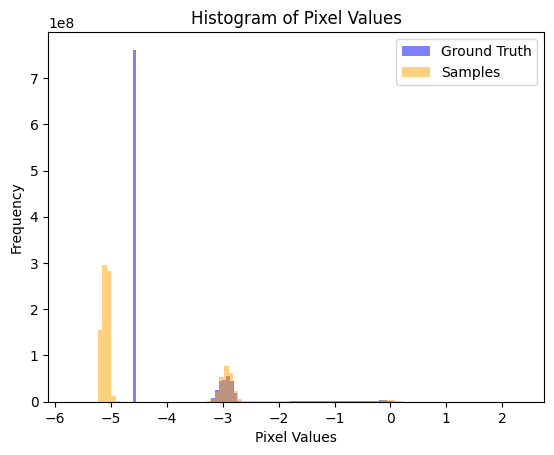

In [5]:

plt.hist(ground_truth_pixels, bins=100, alpha=0.5, label='Ground Truth', color='blue')
plt.hist(samples_list_pixels, bins=100, alpha=0.5, label='Samples', color='orange')


plt.xlabel('Pixel Values')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Values')
plt.legend(loc='upper right')

plt.show()

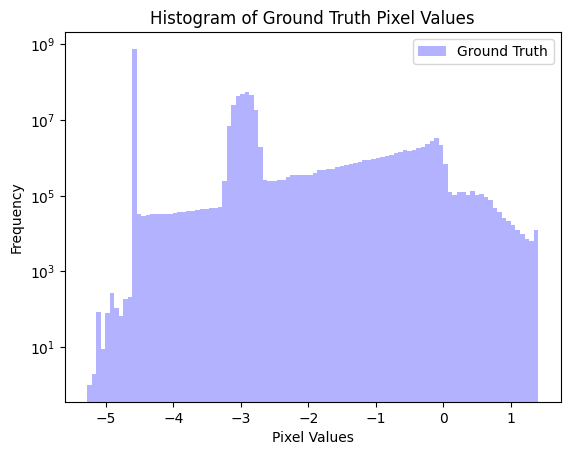

In [6]:
plt.hist(ground_truth_pixels, bins=100, alpha=0.3, label='Ground Truth', color='blue')

plt.xlabel('Pixel Values')
plt.ylabel('Frequency')
plt.title('Histogram of Ground Truth Pixel Values')
plt.legend(loc='upper right')
plt.yscale('log') 

plt.show()

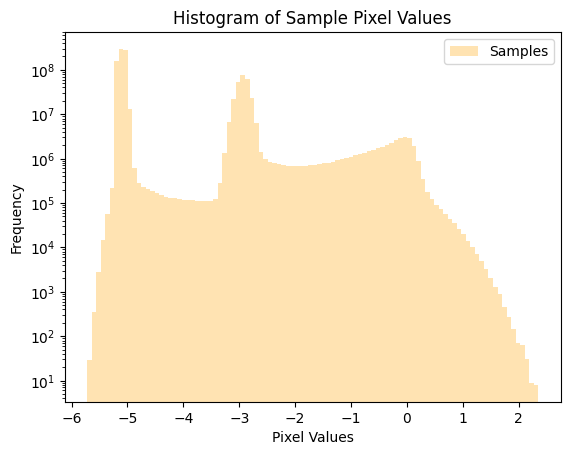

In [7]:
plt.hist(samples_list_pixels, bins=100, alpha=0.3, label='Samples', color='orange')
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Pixel Values')
plt.legend(loc='upper right')
plt.yscale('log') 
plt.show()

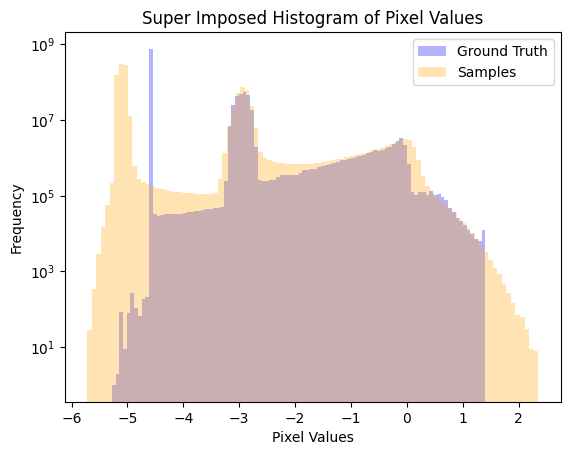

In [8]:
# Plot the histograms
plt.hist(ground_truth_pixels, bins=100, alpha=0.3, label='Ground Truth', color='blue')
plt.hist(samples_list_pixels, bins=100, alpha=0.3, label='Samples', color='orange')


plt.xlabel('Pixel Values')
plt.ylabel('Frequency')
plt.title('Super Imposed Histogram of Pixel Values')
plt.legend(loc='upper right')
plt.yscale('log') 

plt.show()

In [9]:
print(np.mean(ground_truth[0][0]))

-4.605170185988091


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 1.871s...


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[t-SNE] Computed neighbors for 2000 samples in 37.905s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 296.928016
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.507019
[t-SNE] KL divergence after 1000 iterations: 0.720647


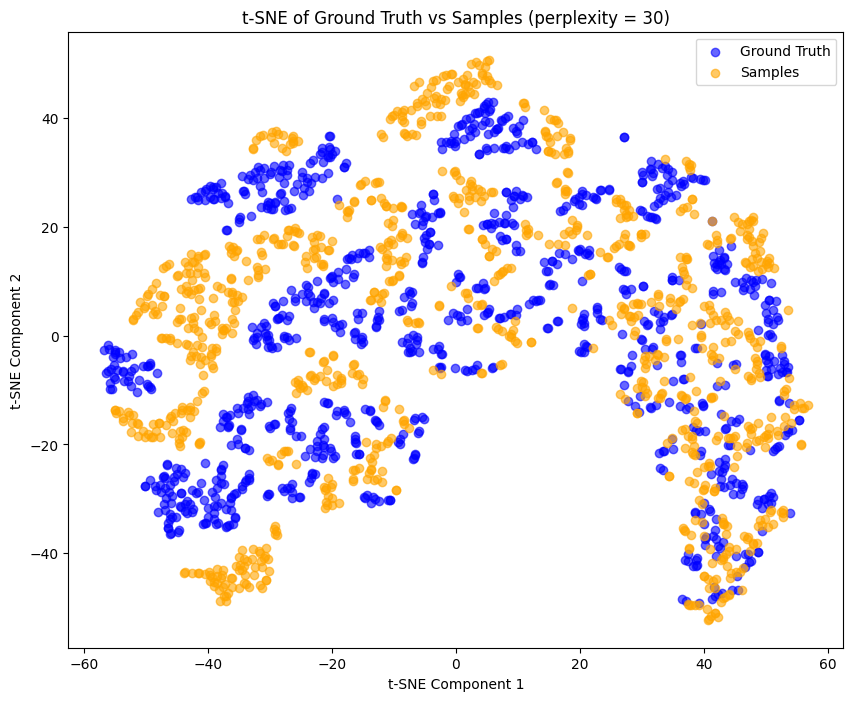

In [10]:
from sklearn.manifold import TSNE
ground_truth_flat = np.array([img.flatten() for img in ground_truth]) 
samples_list_flat = np.array([img.flatten() for img in samples_list])

all_data = np.vstack([ground_truth_flat, samples_list_flat])

tsne = TSNE(n_components=2, perplexity=30, random_state=42, verbose=1)
tsne_results = tsne.fit_transform(all_data)

ground_truth_tsne = tsne_results[:len(ground_truth_flat)]
samples_list_tsne = tsne_results[len(ground_truth_flat):]

plt.figure(figsize=(10, 8))
plt.scatter(ground_truth_tsne[:, 0], ground_truth_tsne[:, 1], c='blue', label='Ground Truth', alpha=0.6)
plt.scatter(samples_list_tsne[:, 0], samples_list_tsne[:, 1], c='orange', label='Samples', alpha=0.6)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Ground Truth vs Samples (perplexity = 30)')
plt.legend()
plt.show()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2000 samples in 1.599s...


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[t-SNE] Computed neighbors for 2000 samples in 35.608s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 321.129953
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.064411
[t-SNE] KL divergence after 1000 iterations: 0.639884


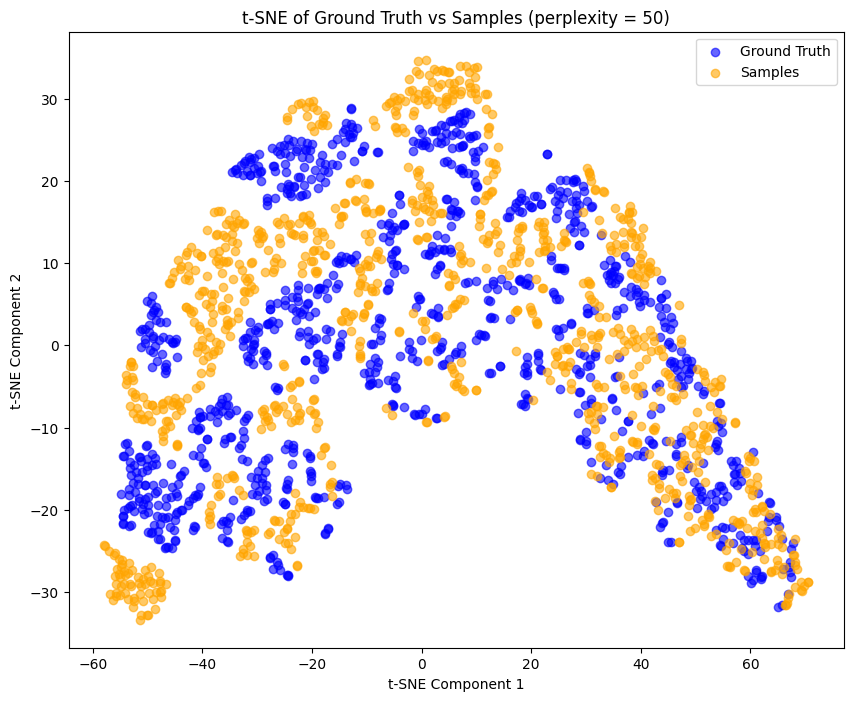

In [11]:
tsne = TSNE(n_components=2, perplexity=50, random_state=42, verbose=1)
tsne_results = tsne.fit_transform(all_data)

ground_truth_tsne = tsne_results[:len(ground_truth_flat)]
samples_list_tsne = tsne_results[len(ground_truth_flat):]

plt.figure(figsize=(10, 8))
plt.scatter(ground_truth_tsne[:, 0], ground_truth_tsne[:, 1], c='blue', label='Ground Truth', alpha=0.6)
plt.scatter(samples_list_tsne[:, 0], samples_list_tsne[:, 1], c='orange', label='Samples', alpha=0.6)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Ground Truth vs Samples (perplexity = 50)')
plt.legend()
plt.show()

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2000 samples in 1.484s...


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[t-SNE] Computed neighbors for 2000 samples in 34.806s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 237.419560
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.170235
[t-SNE] KL divergence after 1000 iterations: 0.799179


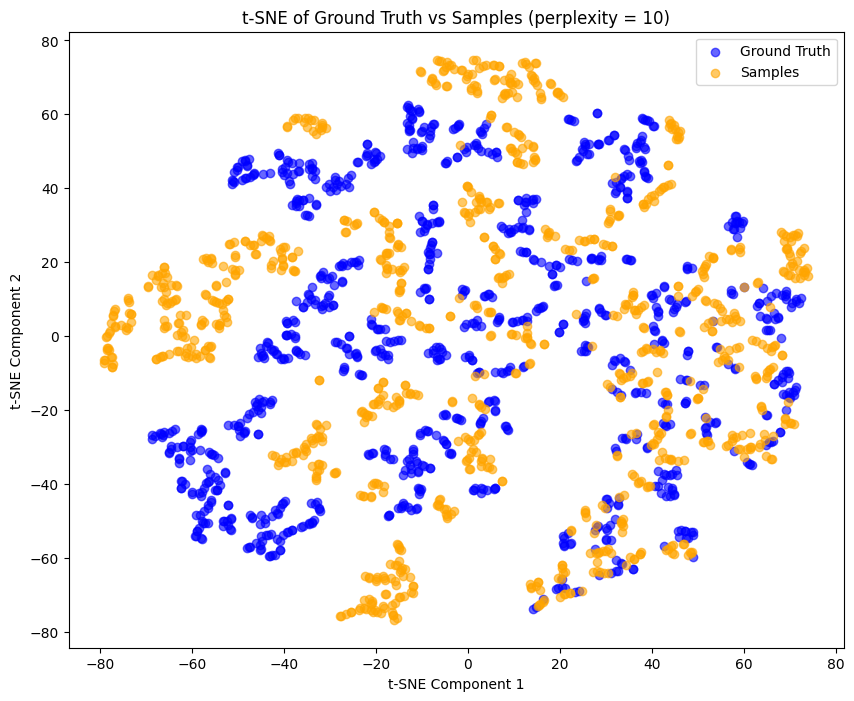

In [12]:
tsne = TSNE(n_components=2, perplexity=10, random_state=42, verbose=1)
tsne_results = tsne.fit_transform(all_data)

ground_truth_tsne = tsne_results[:len(ground_truth_flat)]
samples_list_tsne = tsne_results[len(ground_truth_flat):]

plt.figure(figsize=(10, 8))
plt.scatter(ground_truth_tsne[:, 0], ground_truth_tsne[:, 1], c='blue', label='Ground Truth', alpha=0.6)
plt.scatter(samples_list_tsne[:, 0], samples_list_tsne[:, 1], c='orange', label='Samples', alpha=0.6)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Ground Truth vs Samples (perplexity = 10)')
plt.legend()
plt.show()

In [13]:
print(all_data.shape)

(2000, 1048576)


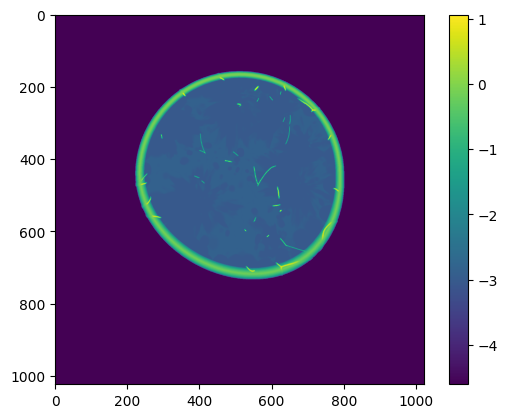

In [14]:
plt.imshow(ground_truth[0], cmap='viridis')
plt.colorbar()

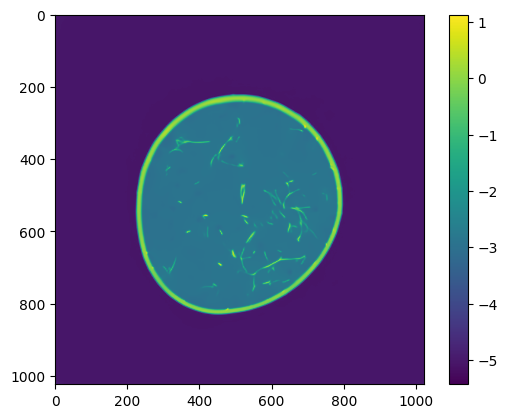

In [21]:
plt.imshow(samples_list[10], cmap='viridis')
plt.colorbar()

In [16]:
image = samples_list[5]
print(image.shape)

(1024, 1024, 1)


In [17]:

U = torch.load("/workspace/thomas/latentDiffusion/autoencoderTraining/scripts/U.pt")
U_k =  U[:, :1024].to('cuda').requires_grad_(False)
full_latent_dim = [4,32,32]
image = torch.tensor(image).to('cuda').squeeze().float()
image = image.unsqueeze(0)
print(image.shape)
batch_size = image.shape[0] 
image = image.reshape(-1, batch_size)
image = torch.matmul(U_k, image)
image = image.view(batch_size, full_latent_dim
            [0], full_latent_dim[1], full_latent_dim[2])  
        
image = image.view(-1, batch_size)
image = torch.matmul(U_k.T, image)
image = image.view(batch_size, full_latent_dim[0], 16, 16)

plt.imshow(image.to('cpu').detach().numpy(), cmap='viridis')


torch.Size([1, 1024, 1024])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (4096x1024 and 1048576x1)